In [34]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize


In [36]:
# Function to compute the heat kernel K(x, t) with matrix A
def heat_kernel(x, y, t, A):
    """
    Compute the heat kernel K(x, t) in 2D space for anisotropic diffusion.

    Parameters:
        x (ndarray): X-coordinates of the grid points.
        y (ndarray): Y-coordinates of the grid points.
        t (float): Time.
        A (ndarray): Positive definite, symmetric 2x2 matrix controlling anisotropy.
    
    Returns:
        ndarray: Heat kernel values at the grid points.
    """
    # Combine x and y into a 2D position vector
    coords = np.stack((x.ravel(), y.ravel()), axis=1)  # Shape (N, 2)

    # Compute x^T A^{-1} x for each grid point
    A_inv = np.linalg.inv(A)
    quad_form = np.einsum('ij,jk,ik->i', coords, A_inv, coords)  # Quadratic form x^T A^{-1} x

    # Compute the normalization factor and the exponential term
    det_A = np.linalg.det(A)
    normalization = 1 / (4*np.pi*t*np.sqrt(det_A))
    exp_term = np.exp(-quad_form / (4 * t))

    # Reshape back to grid shape
    K = (normalization * exp_term).reshape(x.shape)
    return K

In [38]:
# Define the grid in 2D space
grid_size = 100  # Number of points along each axis
x = np.linspace(-5, 5, grid_size)  # X-coordinates
y = np.linspace(-5, 5, grid_size)  # Y-coordinates
X, Y = np.meshgrid(x, y)  # Create a mesh grid

# Parameters for the heat kernel
A = np.array([[1.0, 0.5], [0.5, 2.0]])  # Symmetric, positive definite matrix
time_steps = [0.1, 1, 5, 10, 20]  # Time steps for simulation

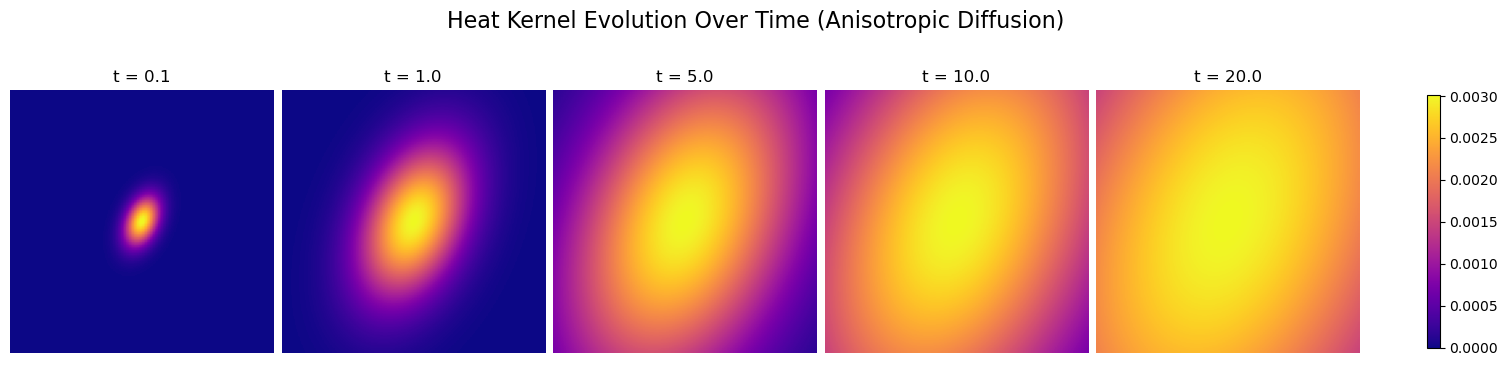

In [40]:
# Create heatmaps for each time step
fig, axes = plt.subplots(1, len(time_steps), figsize=(15, 4), constrained_layout=True)
fig.suptitle("Heat Kernel Evolution Over Time (Anisotropic Diffusion)", fontsize=16)

for i, t in enumerate(time_steps):
    # Compute the heat kernel at the current time step
    K = heat_kernel(X, Y, t, A)
    ax = axes[i]
    # Plot the heat kernel
    im = ax.imshow(K, extent=(-5, 5, -5, 5), origin="lower", cmap="plasma",
                   norm=Normalize(vmin=0, vmax=K.max()))
    ax.set_title(f"t = {t:.1f}")
    ax.axis("off")

# Add a colorbar for the last plot
fig.colorbar(im, ax=axes, orientation="vertical", shrink=0.7)
plt.show()

In [29]:
time_steps

[0.1, 1, 5, 10, 20]

In [31]:
alpha


1.0